# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Необходимо описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Построить гистограммы и опишисать распределения.

Так же необходимо проверьте гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

# Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from scipy import stats as st
import seaborn as sns

data_tarrifs  = pd.read_csv("/datasets/tariffs.csv") 
data_messages = pd.read_csv("/datasets/messages.csv") # , dtype={'message_date':''} не загрузилось
data_internet = pd.read_csv("/datasets/internet.csv", index_col=0) 
data_users    = pd.read_csv("/datasets/users.csv") 
data_calls    = pd.read_csv("/datasets/calls.csv") 

## Анализ наборов данных

In [2]:
def display_data_info(data):
    print(data.info())
    print(100*'=')
    print(data.columns)
    print(100*'=')
    print(data.head(10))
    print(100*'=')
    print(data.isna().sum())

In [3]:
display_data_info(data_tarrifs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1    

In [4]:
display_data_info(data_messages)
#заменить тип message_date на ДТ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
Index(['id', 'message_date', 'user_id'], dtype='object')
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000
5  1000_5   2018-06-20     1000
6  1000_6   2018-11-19     1000
7  1000_7   2018-10-29     1000
8  1000_8   2018-06-25     1000
9  1000_9   2018-12-18     1000
id              0
message_date    0
user_id         0
dtype: int64


In [5]:
display_data_info(data_internet)
#заменить тип session_date на ДТ
#изучить колонку 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None
Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')
       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000
5  1000_5   399.97   2018-10-02     1000
6  1000_6   540.08   2018-09-07     1000
7  1000_7   415.70   2018-07-11     1000
8  1000_8   505.40   2018-10-08     1000
9  1000_9   345.54   2018-09-03     1000
id              0
mb_used         0
sess

In [6]:
display_data_info(data_users)
#порпущенные значение churn_date
#заменить тип reg_date на ДТ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')
   user_id  age churn_date              city first_name  last_name  \
0     1000   52        NaN         Краснодар     Рафаил  Верещагин   
1     1001   41        NaN            Москва       Иван       Ежов   
2     1002   59        NaN       Стерлитамак    Евгений  Абрамович   
3     1003   23        NaN        

In [7]:
display_data_info(data_calls)
#заменить тип call_date на ДТ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
5  1000_5  2018-11-02      0.00     1000
6  1000_6  2018-10-18      0.00     1000
7  1000_7  2018-08-22     18.31     1000
8  1000_8  2018-09-15     18.44     1000
9  1000_9  2018-08-15      0.00     1000
id           0
call_date    0
duration     0
user_id      0


## Анализ уникальных значений

In [8]:
def display_unique_count(data, columns):
    print(columns, "\n" ,data.sort_values(columns)[columns].unique())
    print(100*'=')

In [9]:
for column in list(data_tarrifs.columns):
    display_unique_count(data_tarrifs, column)

messages_included 
 [  50 1000]
mb_per_month_included 
 [15360 30720]
minutes_included 
 [ 500 3000]
rub_monthly_fee 
 [ 550 1950]
rub_per_gb 
 [150 200]
rub_per_message 
 [1 3]
rub_per_minute 
 [1 3]
tariff_name 
 ['smart' 'ultra']


In [10]:
for column in list(data_messages.columns):
    display_unique_count(data_messages, column)

id 
 ['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']
message_date 
 ['2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-06'
 '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10' '2018-01-11'
 '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15' '2018-01-16'
 '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20' '2018-01-21'
 '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25' '2018-01-26'
 '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30' '2018-01-31'
 '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-10'
 '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14' '2018-02-15'
 '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19' '2018-02-20'
 '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24' '2018-02-25'
 '2018-02-26' '2018-02-27' '2018-02-28' '2018-03-01' '2018-03-02'
 '2018-03-03' '2018-03-04' '2018-03-05' '2018-03-06' '2018-03-07'
 '2018-03-08' '2018-03-09' '2018-03-10' '2018-03-11' '2018

In [11]:
for column in list(data_internet.columns):
    display_unique_count(data_internet, column)

id 
 ['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']
mb_used 
 [0.00000e+00 3.00000e-02 4.00000e-02 ... 1.65155e+03 1.70275e+03
 1.72483e+03]
session_date 
 ['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'
 '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09'
 '2018-02-10' '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14'
 '2018-02-15' '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19'
 '2018-02-20' '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24'
 '2018-02-25' '2018-02-26' '2018-02-27' '2018-02-28' '2018-03-01'
 '2018-03-02' '2018-03-03' '2018-03

In [12]:
for column in list(data_users.columns):
        display_unique_count(data_users, column)

user_id 
 [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1

In [13]:
for column in list(data_calls.columns):
    display_unique_count(data_calls, column)

id 
 ['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']
call_date 
 ['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'
 '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09'
 '2018-02-10' '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14'
 '2018-02-15' '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19'
 '2018-02-20' '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24'
 '2018-02-25' '2018-02-26' '2018-02-27' '2018-02-28' '2018-03-01'
 '2018-03-02' '2018-03-03' '2018-03-04' '2018-03-05' '2018-03-06'
 '2018-03-07' '2018-03-08' '2018-03-09' '2018-03-10' '2018-03

## Анализ аномальных и выпадающих значений

### Проверим идентичность user_id

In [14]:
if (list(data_messages.sort_values('user_id')['user_id'].unique()) ==
    list(data_internet.sort_values('user_id')['user_id'].unique()) ==
    list(data_users.sort_values('user_id')['user_id'].unique()) == 
    list(data_calls.sort_values('user_id')['user_id'].unique())):
    print('Наборы идентификаторов равны')
else:
    print('Наборы идентификаторов не равны, требуется анализ')

Наборы идентификаторов не равны, требуется анализ


### Анализ распределения звонков

<AxesSubplot:>

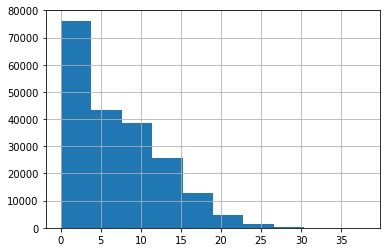

In [15]:
data_calls['duration'].hist()

### Анализ распределения сообщений

array([[<AxesSubplot:title={'center':'message_date'}>]], dtype=object)

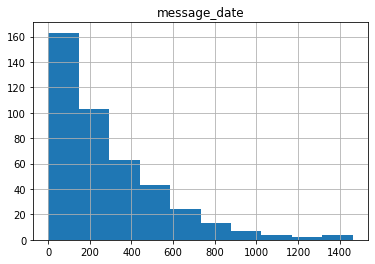

In [16]:
data_messages.groupby('user_id').agg({'message_date':'count'}).hist()

### Анализ распределения интернет трафика

array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

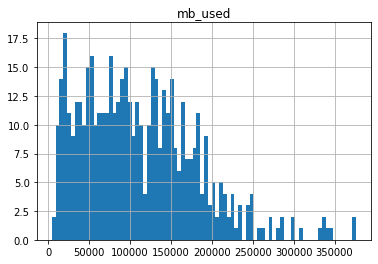

In [17]:
data_internet.groupby('user_id').agg({'mb_used':'sum'}).hist(bins = 80)

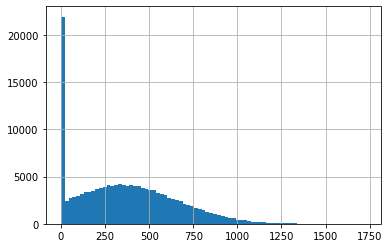

In [18]:
data_internet.mb_used.hist(bins = 80);

## Удаление дубликатов

In [19]:
data_messages.drop_duplicates().reset_index(drop=True)  
data_internet.drop_duplicates().reset_index(drop=True)  
data_users.drop_duplicates().reset_index(drop=True)     
data_calls.drop_duplicates().reset_index(drop=True)  

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


## Выводы

- После первичного анализа можно сделать вывод, что набор данных составлен хорошо, без крупных ошибок или проблем.
- Почти во всех наборах данных неверный тип для данных типа DateTime. 
- В наборе с данными по пользователям, есть пропущенные данные в колонке churn_date, которые обозначают, что клиент еще пользуется тарифом
- Визуальный анализ данных позволяет сделать предварительный вывод, что явных артефактов и\или ошибок нет.
- Так же трубется изучить расхождение данных между идентификаторами пользователей.

In [20]:
# check
set(data_users.user_id) - set(data_calls.user_id)

{1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489}

# Подготовка данных

## Нормализация типов

In [21]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

## Анализ ошибок

In [22]:
#колонка 'Unnamed: 0' очень похоже на дубль индекса. Проверим соответствие ее значений номерам индекса
#data_internet[data_internet['Unnamed: 0'] != data_internet.index]    

In [23]:
#принимаем допущение, что в наборе data_users эталонные данные

delta_calls = list(set(data_users.sort_values('user_id')['user_id'].unique()) 
      - set(data_calls.sort_values('user_id')['user_id'].unique()))

delta_message = list(set(data_users.sort_values('user_id')['user_id'].unique()) 
      - set(data_messages.sort_values('user_id')['user_id'].unique()))

delta_internet = list(set(data_users.sort_values('user_id')['user_id'].unique()) 
      - set(data_internet.sort_values('user_id')['user_id'].unique()))

print(set(delta_calls) & set(delta_message) & set(delta_internet))

{1128, 1371}


В предоставленных наборах есть 2 пользователя, которые не имеют данных о потребляемых ресурсах. Придется их удалить.

## Исправление ошибок

In [24]:
#удалим колонку 'Unnamed: 0' в data_internet
#data_internet.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [25]:
#удалим строки из основного набора без данных
(data_users.drop(index=list(data_users[((data_users['user_id']==1128) | 
                                  (data_users['user_id']==1371))].index), inplace=True))

In [26]:
#заменим NaN в churn_date
data_users.loc[data_users['churn_date'].isna()==True,'churn_date'] = pd.to_datetime('1970-01-01',format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

# Анализ данных

In [27]:
def display_tarif_hist(data, column_name):
    #current_data = data[data['tariff']==tarrif].groupby(['month']).agg({column_name:method}).reset_index() 
    #print(current_data.plot(y=column_name, x='month', kind='box'))
    g = sns.catplot(y='tariff', x=column_name, kind="box", data= data, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)
    print(100*'=')
    for tariff in list(data_tarrifs['tariff_name']): 
        display(tariff, data[data['tariff']==tariff][column_name].describe())
        print('Дисперсия: ',np.var(data[data['tariff']==tariff][column_name]))
    print(100*'*')

In [28]:
#для того что бы рассчитать выручку по клиенту, 
#необходимо получить сумму использованных ресурсов по пользователям в разрезе месяца

data_calls['month'] = data_calls['call_date'].dt.month
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls_by_month = data_calls.groupby(['user_id','month']).agg({'duration':'sum'}).rename(columns={'duration':'call'})

data_messages['month'] = data_messages['message_date'].dt.month
data_messages_by_month = (data_messages.groupby(['user_id','month'])
                                .agg({'message_date':'count'})
                                .rename(columns={'message_date':'message'}))

data_internet['month'] = data_internet['session_date'].dt.month
data_internet_by_month = (data_internet.groupby(['user_id','month'])
                                .agg({'mb_used':'sum'})
                                .rename(columns={'mb_used':'mb'}))


In [29]:
#final_data = data_users[['user_id', 'tariff','city']].copy()
#final_data = data_calls_by_month.join(final_data.set_index('user_id'), on='user_id')
#final_data = final_data.join(data_messages_by_month)
#final_data = final_data.join(data_internet_by_month)

final_data = data_calls_by_month.copy()
final_data = final_data.join(data_messages_by_month, how='outer')
final_data = final_data.join(data_internet_by_month, how='outer')
final_data = (final_data.reset_index()
                        .set_index('user_id')
                        .join(data_users[['user_id', 'tariff','city']].set_index('user_id'),
                              on='user_id'))
final_data = final_data.reset_index()

In [30]:
# check
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3214 non-null   int64  
 1   month    3214 non-null   int64  
 2   call     3174 non-null   float64
 3   message  2717 non-null   float64
 4   mb       3203 non-null   float64
 5   tariff   3214 non-null   object 
 6   city     3214 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 175.9+ KB


In [31]:
#проверим на пропуски
final_data.isna().sum()

user_id      0
month        0
call        40
message    497
mb          11
tariff       0
city         0
dtype: int64

In [32]:
final_data.loc[final_data['message'].isna()==True,'message'] = 0
final_data.loc[final_data['mb'].isna()==True,'mb'] = 0
final_data.loc[final_data['call'].isna()==True,'call'] = 0

In [33]:
data_users_group = data_users.groupby('tariff').agg({'user_id':'count'}).reset_index()
#data_users_group.columns = [tup[1] if tup[1] else tup[0] for tup in data_users_group.columns]
data_users_group

,tariff,user_id
0,smart,350
1,ultra,148


## Анализ минут разговора

'smart'

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: call, dtype: float64

Дисперсия:  36203.06665209469


'ultra'

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: call, dtype: float64

Дисперсия:  100771.2236172022
****************************************************************************************************


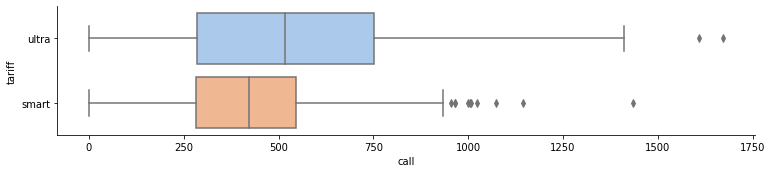

In [34]:
display_tarif_hist(final_data, 'call')

Средние и медиана очень близки между собой в обоих тарифах. В тарифе ультра медиана меньше среднего, это говорит о выбросах на больших значениях.

В среднем пользователи тарифа смарт используют 417 минут, медиана 422 минут. Большая часть пользователей потребляет от 282 минут до 545 минут (25-75 перцентиль).

В среднем пользователи тарифа ультра используют 526 минут, медиана 518 минут. Большая часть пользователей потребляет от 284 минут до 752 минут (25-75 перцентиль).

Таким образом можно сделать вывод, что пользователи тарифа смарт используют порядка 80% предоставленного времени, в то время как пользователи тарифа ультра только около 18%. 

## Анализ сообщений 

'smart'

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message, dtype: float64

Дисперсия:  796.455482917076


'ultra'

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: message, dtype: float64

Дисперсия:  2282.9460753948824
****************************************************************************************************


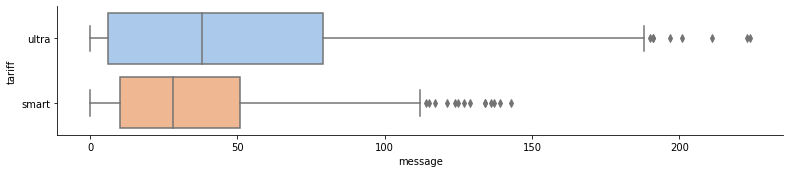

In [35]:
display_tarif_hist(final_data, 'message')

Среднее больше медианы в обох тарифах, это говорит о том, что есть пользователи, которые отправляют много сообщений.

В среднем пользователи тарифа смарт используют 33 сообщений, медиана 28 минут. Большая часть пользователей отправляет от 10 до 51 сообщений (25-75 перцентиль).

В среднем пользователи тарифа ультра отправляют 49 сообщений, медиана 38 минут. Большая часть пользователей потребляет от 6 до 79 сообщений (25-75 перцентиль).

Таким образом можно сделать вывод, что пользователи тарифа смарт используют порядка 80% предоставленных сообщений, в то время как пользователи тарифа ультра только около 6%. 

## Анализ объёма интернет-трафика 

'smart'

count     2229.000000
mean     16208.386990
std       5870.476681
min          0.000000
25%      12643.010000
50%      16506.840000
75%      20042.930000
max      38552.450000
Name: mb, dtype: float64

Дисперсия:  34447035.49528493


'ultra'

count      985.000000
mean     19468.805208
std      10087.170752
min          0.000000
25%      11770.260000
50%      19308.010000
75%      26837.690000
max      49745.690000
Name: mb, dtype: float64

Дисперсия:  101647713.2617464
****************************************************************************************************


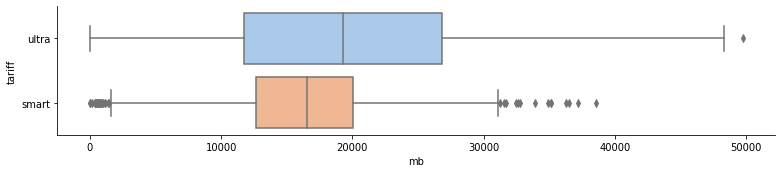

In [36]:
display_tarif_hist(final_data, 'mb')

Средние и медиана очень близки между собой в обоих тарифах. Это говорит об отсутствии всплеской с обоих концов, т.е. данные более менее однородные.

В среднем пользователи тарифа смарт используют 16 ГБ, медиана 16,5 ГБ. Большая часть пользователей отправляет от 12 ГБ  до 20 ГБ (25-75 перцентиль).

В среднем пользователи тарифа ультра отправляют 19,5 ГБ, медиана 19 ГБ. Большая часть пользователей потребляет от 11 ГБ до 26 ГБ (25-75 перцентиль).

Таким образом можно сделать вывод, что пользователи тарифа смарт используют 110% от предоставленного объема, в то время как пользователи тарифа ультра только около 70%. 

## Выводы

Средние и медиана по звонка очень близки между собой в обоих тарифах. В тарифе ультра медиана меньше среднего, это говорит о выбросах на больших значениях.
В данных по сообщениям среднее больше медианы в обох тарифах, это говорит о том, что есть пользователи, которые отправляют много сообщений.
Средние и медиана в данных по расходу интернета очень близки между собой в обоих тарифах. Это говорит об отсутствии всплеской с обоих концов, т.е. данные более менее однородные.

Средний профиль пользователя тарифа Смарт:
Используют 417 минут из 500. Большая часть пользователей потребляет от 282 минут до 545 минут (25-75 перцентиль).
Используют 33 сообщений из 50. Большая часть пользователей отправляет от 10 до 51 сообщений (25-75 перцентиль).
Используют 16 ГБ из 15. Большая часть пользователей отправляет от 12 ГБ  до 20 ГБ (25-75 перцентиль).

Средний профиль пользователя тарифа Ультра:
Используют 526 минут из 3000. Большая часть пользователей потребляет от 284 минут до 752 минут (25-75 перцентиль).
Используют  49 сообщений из 1000. Большая часть пользователей потребляет от 6 до 79 сообщений (25-75 перцентиль).
Используют 19,5 ГБ из 30. Большая часть пользователей потребляет от 11 ГБ до 26 ГБ (25-75 перцентиль).

Пользователи тарифа смарт используют по 80% от времени звонков и сообщений, при этом перерасходуют интернет 110% от включенного в тариф.
Пользователи тарифа ультра используют 18% от звонков, 6% от сообщений и 70% от пакета интернета.

# Проверка гипотез

In [37]:
#дополним данными по тарифу и рассчитаем превышения
def set_month_revenue(row):
    current_tariff = data_tarrifs.loc[data_tarrifs['tariff_name']==row['tariff'],['rub_monthly_fee']]
    return current_tariff.values[0][0]

In [38]:
def set_extra_revenue(row):
    current_tariff = data_tarrifs[data_tarrifs['tariff_name']==row['tariff']]
    extra_min = 0
    extra_msg = 0
    extra_mb = 0

    if row['call'] > current_tariff['minutes_included'].values[0]:
        extra_min = row['call']  - current_tariff['minutes_included'].values[0] 
           
    if row['message'] > current_tariff['messages_included'].values[0]:
        extra_msg = row['message']  - current_tariff['messages_included'].values[0] 
        
    if row['mb'] > current_tariff['mb_per_month_included'].values[0]:
        extra_mb = (row['mb']  - current_tariff['mb_per_month_included'].values[0])/1024
        extra_mb = math.ceil(extra_mb)
        
    return (extra_mb*current_tariff['rub_per_gb'].values[0]
                           +extra_min*current_tariff['rub_per_minute'].values[0]
                           +extra_msg*current_tariff['rub_per_message'].values[0])

In [39]:
final_data['month_revenue'] = final_data.apply(set_month_revenue,axis=1)
final_data['extra_revenue'] = final_data.apply(set_extra_revenue,axis=1)
final_data['total_revenue'] = final_data['month_revenue'] + final_data['extra_revenue']

In [40]:
# check
final_data['total_revenue'].sum()

4914451.0

In [41]:
# check
final_data[final_data ['call'] > 500].tail(4)

,user_id,month,call,message,mb,tariff,city,month_revenue,extra_revenue,total_revenue
3201,1496,11,662.0,46.0,25063.40,smart,Вологда,550,2486.0,3036.0
3202,1496,12,518.0,51.0,20736.15,smart,Вологда,550,1257.0,1807.0
3205,1497,12,545.0,17.0,19918.60,smart,Челябинск,550,1135.0,1685.0
3212,1499,11,612.0,59.0,17963.31,smart,Пермь,550,963.0,1513.0


In [42]:
# check
final_data[final_data ['user_id'] == 1000]

,user_id,month,call,message,mb,tariff,city,month_revenue,extra_revenue,total_revenue
0,1000,5,159.0,22.0,2253.49,ultra,Краснодар,1950,0.0,1950.0
1,1000,6,172.0,60.0,23233.77,ultra,Краснодар,1950,0.0,1950.0
2,1000,7,340.0,75.0,14003.64,ultra,Краснодар,1950,0.0,1950.0
3,1000,8,408.0,81.0,14055.93,ultra,Краснодар,1950,0.0,1950.0
4,1000,9,466.0,57.0,14568.91,ultra,Краснодар,1950,0.0,1950.0
5,1000,10,350.0,73.0,14702.49,ultra,Краснодар,1950,0.0,1950.0
6,1000,11,338.0,58.0,14756.47,ultra,Краснодар,1950,0.0,1950.0
7,1000,12,333.0,70.0,9817.61,ultra,Краснодар,1950,0.0,1950.0


## Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

- H0: mean_rev_ultra = mean_rev_smart Средняя выручка по тарифам равна.
- H1: mean_rev_ultra <> mean_rev_smart Средняя выручка по тарифам не равна.

In [43]:
results  = st.ttest_ind (final_data[final_data['tariff']=='ultra']['total_revenue'],
                                   final_data[final_data['tariff']=='smart']['total_revenue'])

alpha = .05

if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу. Вероятность схождения данных {results.pvalue:2.2%}')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу. Вероятность схождения данных {results.pvalue:2.2%}') 


Отвергаем нулевую гипотезу. Вероятность схождения данных 0.00%


По результатам исследования, мы отвергли H0 гипотезу, о том, что среднее вознаграждение между тарифами равно, следовательно оставляем гипотезу о их неравенстве.

## Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

- H0: mean_rev_mos = mean_rev_other Средняя выручка пользователей Москвы равна пользователям других регионов.
- H1: mean_rev_mos <> mean_rev_other Средняя выручка пользователей Москвы не равна пользователям других регионов.

In [44]:
results  = st.ttest_ind (final_data[final_data['city']=='Москва']['total_revenue'],
                                   final_data[final_data['city']!='Москва']['total_revenue'])

alpha = .05

if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу. Вероятность схождения данных {results.pvalue:2.2%}')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу. Вероятность схождения данных {results.pvalue:2.2%}') 
    
print('Средняя выручка в Москве: ', final_data[final_data['city']=='Москва']['total_revenue'].mean())
print('Средняя выручка не в Москве: ', final_data[final_data['city']!='Москва']['total_revenue'].mean())

Не получилось отвергнуть нулевую гипотезу. Вероятность схождения данных 54.40%
Средняя выручка в Москве:  1546.7135842880523
Средняя выручка не в Москве:  1524.9362274298885


In [45]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


По результатам исследования, мы не можем отвергнуть H0 о том что средняя выручка пользователей Москвы равна выручке пользователей других регионов. 

С вероятностью 54,4% эти наборы данных имеют одинаковое распределение и среднее, т.е. вероятность того что эти 2 набора идентичны достаточно высока. Поэтому мы не можем опровергнуть гипотезу о том что выручка между Москвой и регионами отличается. 

## Анализ выручки тарифов

In [46]:
#вычислим доход на пользователя с продажи доп услуг.
tariff_revenue = final_data.groupby(['tariff','month']).agg({'extra_revenue':'sum','user_id':'count'}).reset_index() 
tariff_revenue['per_user'] = tariff_revenue['extra_revenue']/tariff_revenue['user_id']
tariff_revenue.groupby('tariff').agg({'per_user':'mean'})

,per_user
tariff,
smart,629.924424
ultra,96.932856


In [47]:
#вычислим доход на пользователя в разрезе тарифов.
tariff_revenue = final_data.groupby(['tariff','month']).agg({'total_revenue':'sum','user_id':'count'}).reset_index() 
tariff_revenue['per_user'] = tariff_revenue['total_revenue']/tariff_revenue['user_id']
tariff_revenue.groupby('tariff').agg({'per_user':'mean'})

,per_user
tariff,
smart,1179.924424
ultra,2046.932856


В среднем компания получает 1179 рублей с пользователя на тарифе смарт из которых 629 рублей оплата превышения ресурсов.
В среднем компания получает 2046 рублей с пользователя на тарифе ультра из которых 96 рублей оплата превышения ресурсов. 

Без знания сбестоимость сделать вывод о том, какой тариф выгоднее - невозможно. При этом пользователи тарифа смарт используют практически все доступные ресурсы (80-110%), в то время как пользователи тарифа ультра используют только некую часть доступных ресурсов (6-70%). Выводы о выгодности придется делать коммерческому департаменту самостоятельно, на основании результатов п5.3 и п4.4

# Выводы

- После первичного анализа можно сделать вывод, что набор данных составлен хорошо, без крупных ошибок или проблем.
- Почти во всех наборах данных неверный тип для данных типа DateTime. 
- В наборе с данными по пользователям, есть пропущенные данные в колонке churn_date, которые обозначают, что клиент еще пользуется тарифом
- Визуальный анализ данных позволяет сделать предварительный вывод, что явных артефактов и\или ошибок нет.
- Анализ наборов данных показывает, что есть пользователи, которые не пользовались каким-то услугами.


Средние и медиана по звонка очень близки между собой в обоих тарифах. В тарифе ультра медиана меньше среднего, это говорит о выбросах на больших значениях.
В данных по сообщениям среднее больше медианы в обох тарифах, это говорит о том, что есть пользователи, которые отправляют много сообщений.
Средние и медиана в данных по расходу интернета очень близки между собой в обоих тарифах. Это говорит об отсутствии всплеской с обоих концов, т.е. данные более менее однородные.

Средний профиль пользователя тарифа Смарт:
Используют 417 минут из 500. Большая часть пользователей потребляет от 282 минут до 545 минут (25-75 перцентиль).
Используют 33 сообщений из 50. Большая часть пользователей отправляет от 10 до 51 сообщений (25-75 перцентиль).
Используют 16 ГБ из 15. Большая часть пользователей отправляет от 12 ГБ  до 20 ГБ (25-75 перцентиль).

Средний профиль пользователя тарифа Ультра:
Используют 526 минут из 3000. Большая часть пользователей потребляет от 284 минут до 752 минут (25-75 перцентиль).
Используют  49 сообщений из 1000. Большая часть пользователей потребляет от 6 до 79 сообщений (25-75 перцентиль).
Используют 19,5 ГБ из 30. Большая часть пользователей потребляет от 11 ГБ до 26 ГБ (25-75 перцентиль).

Пользователи тарифа смарт используют по 80% от времени звонков и сообщений, при этом перерасходуют интернет 110% от включенного в тариф.
Пользователи тарифа ультра используют 18% от звонков, 6% от сообщений и 70% от пакета интернета.


В среднем компания получает 1179 рублей с пользователя на тарифе смарт из которых 629 рублей оплата превышения ресурсов.
В среднем компания получает 2046 рублей с пользователя на тарифе ультра из которых 96 рублей оплата превышения ресурсов. 

Без знания сбестоимость сделать вывод о том, какой тариф выгоднее - невозможно. При этом пользователи тарифа смарт используют практически все доступные ресурсы (80-110%), в то время как пользователи тарифа ультра используют только некую часть доступных ресурсов (6-70%). Выводы о выгодности придется делать коммерческому департаменту самостоятельно, на основании результатов п5.3 и п4.4

Так же получилось опровергнуть гипотезу, о том что выручка между пользователями равна. И не получилось опровергунть гипотезу, что есть разница между пользователями из Москвы и остальными регионами.